In [9]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Data Acquisition

In [1]:
# Connect to Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Loads Heart disease data from Google Drive
df = pd.read_csv('/content/drive/MyDrive/Lecture/CS245/Datasets/heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


ข้อมูลคุณลักษณะ:
* Age: อายุของผู้ป่วย [ปี]
* Sex: เพศของผู้ป่วย [M: ชาย, F: หญิง]
* ChestPainType: ประเภทของอาการเจ็บหน้าอก [TA: อาการเจ็บหน้าอกแบบแองจินาที่มีลักษณะจำเพาะ (Typical Angina), ATA: อาการเจ็บหน้าอกแบบแองจินาที่ไม่จำเพาะ (Atypical Angina), NAP: อาการเจ็บหน้าอกที่ไม่เกี่ยวกับหัวใจ (Non-Anginal Pain), ASY: ไม่มีอาการเจ็บหน้าอก (Asymptomatic)]
* RestingBP: ความดันโลหิตขณะพัก [มม.ปรอท]
* Cholesterol: ระดับคอเลสเตอรอลในเลือด [มก./ดล.]
* FastingBS: ระดับน้ำตาลในเลือดหลังงดอาหาร [1: ถ้า FastingBS > 120 มก./ดล., 0: ถ้าไม่ใช่]
* RestingECG: ผลลัพธ์ของคลื่นไฟฟ้าหัวใจขณะพัก [Normal: ปกติ, ST: มีความผิดปกติของคลื่น ST-T (เช่น การกลับด้านของคลื่น T และ/หรือการยกหรือการตกของคลื่น ST > 0.05 มิลลิโวลต์), LVH: มีภาวะหัวใจโตที่ห้องล่างซ้ายตามเกณฑ์ของ Estes]
* MaxHR: อัตราการเต้นของหัวใจสูงสุดที่ทำได้ [ค่าตัวเลขระหว่าง 60 ถึง 202]
* ExerciseAngina: อาการเจ็บหน้าอกที่เกิดจากการออกกำลังกาย [Y: ใช่, N: ไม่ใช่]
* Oldpeak: ค่า Oldpeak = ST [ค่าตัวเลขที่วัดจากการตกของคลื่น ST]
* ST_Slope: ความชันของคลื่น ST ขณะออกกำลังกายสูงสุด [Up: ชันขึ้น, Flat: คงที่, Down: ชันลง]
* HeartDisease: ผลลัพธ์ [1: มีโรคหัวใจ, 0: ปกติ]





# Data Preparation: Data Encoding
* Data encoding refers to the converting of categorical variables into numerical representations that can be understood by machine learning algorithms.

In [ ]:
df['Sex'].replace(['M','F'],[0,1],inplace=True)
df['ChestPainType'].replace(['TA','ATA','NAP','ASY'],[0,1,2,3],inplace=True)
df['RestingECG'].replace(['Normal','ST','LVH'],[0,1,2],inplace=True)
df['ExerciseAngina'].replace(['N','Y'],[0,1],inplace=True)
df['ST_Slope'].replace(['Up','Flat','Down'],[0,1,2],inplace=True)

In [6]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,0,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,0,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,0,1.2,1,1
914,68,0,3,144,193,1,0,141,0,3.4,1,1
915,57,0,3,130,131,0,0,115,1,1.2,1,1
916,57,1,1,130,236,0,2,174,0,0.0,1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


<Axes: xlabel='HeartDisease', ylabel='count'>

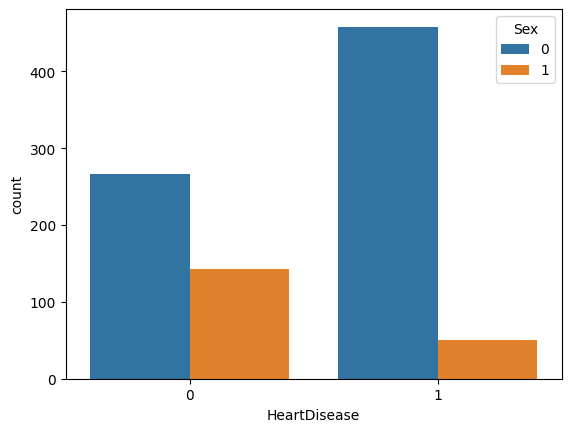

In [10]:
sns.countplot(data=df,x='HeartDisease',hue='Sex')

Explain...

In [11]:
df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,0.165896,0.254399,-0.095282,0.198039,0.213152,-0.382045,0.215793,0.258612,0.268264,0.282039
Sex,-0.055750,1.000000,-0.168254,-0.005133,0.200092,-0.120076,0.018343,0.189186,-0.190664,-0.105734,-0.150693,-0.305445
ChestPainType,0.165896,-0.168254,1.000000,0.022168,-0.136139,0.116703,0.031383,-0.343654,0.416625,0.245027,0.317480,0.471354
RestingBP,0.254399,-0.005133,0.022168,1.000000,0.100893,0.070193,0.097661,-0.112135,0.155101,0.164803,0.075162,0.107589
Cholesterol,-0.095282,0.200092,-0.136139,0.100893,1.000000,-0.260974,0.112095,0.235792,-0.034166,0.050148,-0.111471,-0.232741
FastingBS,0.198039,-0.120076,0.116703,0.070193,-0.260974,1.000000,0.050707,-0.131438,0.060451,0.052698,0.175774,0.267291
RestingECG,0.213152,0.018343,0.031383,0.097661,0.112095,0.050707,1.000000,0.048552,0.036119,0.114428,0.078807,0.061011
MaxHR,-0.382045,0.189186,-0.343654,-0.112135,0.235792,-0.131438,0.048552,1.000000,-0.370425,-0.160691,-0.343419,-0.400421
ExerciseAngina,0.215793,-0.190664,0.416625,0.155101,-0.034166,0.060451,0.036119,-0.370425,1.000000,0.408752,0.428706,0.494282
Oldpeak,0.258612,-0.105734,0.245027,0.164803,0.050148,0.052698,0.114428,-0.160691,0.408752,1.000000,0.501921,0.403951


Explain...

<Axes: >

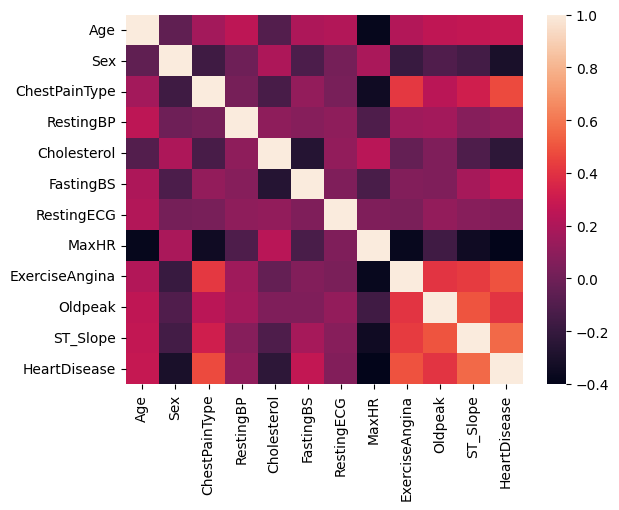

In [12]:
sns.heatmap(df.corr())

Explain...

# Linear Regression

In [ ]:
# Define features (X) and the target variable (y)
# We will predict 'Cholesterol' based on other features.
X = df.drop(['Cholesterol'], axis=1)
y = df['Cholesterol']

In [ ]:
X

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,0,0,172,0,0.0,0,0
1,49,1,2,160,0,0,156,0,1.0,1,1
2,37,0,1,130,0,1,98,0,0.0,0,0
3,48,1,3,138,0,0,108,1,1.5,1,1
4,54,0,2,150,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,0,0,132,0,1.2,1,1
914,68,0,3,144,1,0,141,0,3.4,1,1
915,57,0,3,130,0,0,115,1,1.2,1,1
916,57,1,1,130,0,2,174,0,0.0,1,1


In [ ]:
y

,Cholesterol
0,289
1,180
2,283
3,214
4,195
...,...
913,264
914,193
915,131
916,236


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
795,42,0,2,120,1,0,194,0,0.8,2,0
25,36,0,2,130,0,0,178,0,0.0,0,0
84,56,0,3,150,1,0,125,1,1.0,1,1
10,37,1,2,130,0,0,142,0,0.0,0,0
344,51,0,3,120,1,0,104,0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
106,48,1,3,120,0,1,110,0,0.0,0,0
270,45,0,3,120,0,0,140,0,0.0,0,0
860,60,0,3,130,0,0,144,1,1.4,0,1
435,60,0,3,152,0,1,118,1,0.0,0,0


In [ ]:
X_test

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
668,63,1,1,140,0,0,179,0,0.0,0,0
30,53,0,2,145,0,0,130,0,0.0,1,1
377,65,0,3,160,1,1,122,0,1.2,1,1
535,56,0,3,130,0,2,122,1,1.0,1,1
807,54,0,1,108,0,0,156,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
211,50,1,2,140,0,0,140,1,0.0,1,1
745,63,1,3,108,0,0,169,1,1.8,1,1
584,64,0,3,141,1,1,116,1,1.5,1,1
878,49,0,1,130,0,0,171,0,0.6,0,0


In [ ]:
y_train

,Cholesterol
795,240
25,209
84,213
10,211
344,0
...,...
106,254
270,225
860,253
435,0


In [ ]:
y_test

,Cholesterol
668,195
30,518
377,0
535,0
807,309
...,...
211,288
745,269
584,244
878,266


In [ ]:
#  Train the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

72.10109260498291


In [ ]:
lm.coef_

array([ -0.48279507,  30.63653916,  -6.08244219,   0.5855019 ,
       -50.39050112,  16.23734939,   0.63819809,  25.1192739 ,
        13.83321345,  -4.37091802, -41.6654981 ])

In [ ]:
X_train.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'FastingBS', 'RestingECG',
       'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease'],
      dtype='object')

In [ ]:
lm_coeff = pd.DataFrame(n.reshape(11,1), X.columns,columns=['coeff'])

In [ ]:
lm_coeff

,coeff
Age,-0.482795
Sex,30.636539
ChestPainType,-6.082442
RestingBP,0.585502
FastingBS,-50.390501
RestingECG,16.237349
MaxHR,0.638198
ExerciseAngina,25.119274
Oldpeak,13.833213
ST_Slope,-4.370918


In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
y_pred

array([262.44682486, 156.17518104, 130.42284617, 206.1834265 ,
       202.74082437, 105.06024847, 161.73172117, 226.80224075,
       174.7869614 , 191.69733655, 273.09977409, 187.62287667,
       230.86234395, 233.90818585, 151.95981913, 149.6469124 ,
       229.291118  , 106.99459462, 164.0251556 , 277.90681335,
       190.86464273, 266.68874832, 223.31873403, 253.21728272,
       175.81967172, 174.59625371, 221.071429  , 133.92353713,
       273.34685467, 232.40286636, 148.70194826, 197.38660887,
       227.47124523, 210.63389987, 271.56349896, 277.20549213,
       202.98651759, 227.59754565, 178.84505154, 222.16174157,
       104.87558627, 248.9131645 , 191.20336333, 202.95578431,
       142.74178701, 225.35527255, 151.77386595, 169.67241661,
        78.68270928, 277.40151471, 267.62191037, 260.88353216,
       209.60065004, 221.362281  , 168.06253714, 200.48750029,
       232.88438643, 118.0836622 , 170.3921669 , 208.21647381,
       183.02658596, 219.86017338, 274.07724529, 122.23

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
mse

11597.688870359549

In [ ]:
r2

0.1051993062257045

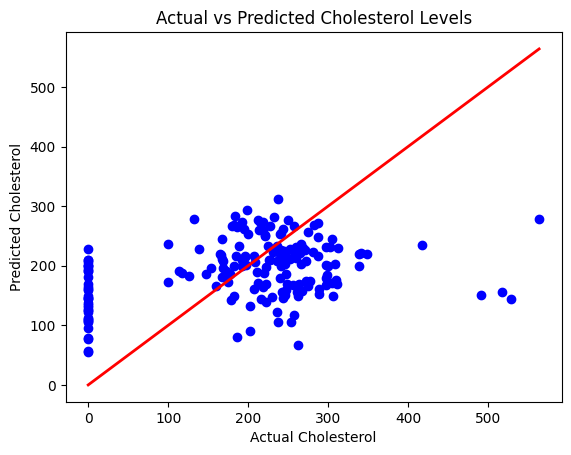

In [ ]:
# Visualize actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Cholesterol Levels')
plt.xlabel('Actual Cholesterol')
plt.ylabel('Predicted Cholesterol')
plt.show()

Explain...

# Supervised Learning: Random Forest Model

# Unsupervised Learning: K-mean